In [1]:
#import packages
import sys
import pandas as pd
import os
import operator
import numpy as np

In [2]:
data=pd.read_csv('AB_test_data.csv')

In [3]:
data

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
1,False,B,2020-08-27,0x46271e
2,False,A,2020-06-11,0x80b8f1
3,False,B,2020-08-22,0x8d736d
4,False,A,2020-08-05,0x96c9c8
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


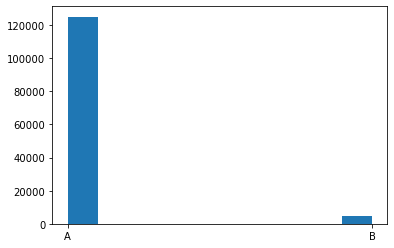

In [4]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

x = data['purchase_TF']
y = data['Variant']

plt.hist(y)
plt.show()

In [5]:
data

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
1,False,B,2020-08-27,0x46271e
2,False,A,2020-06-11,0x80b8f1
3,False,B,2020-08-22,0x8d736d
4,False,A,2020-08-05,0x96c9c8
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


In [6]:
pd.crosstab(data['purchase_TF'],data['Variant'])

Variant,A,B
purchase_TF,,
False,106298,4117
True,18702,883


In [7]:
fp=4117/(4117+106298)
fn=18702/(18702+883)

In [8]:
t_a=18702
f_a=106298
f_b=4117
t_b=883

In [9]:
def prob(t_a,t_b,f_a,f_b):
    p1=t_a/(t_a+f_a)
    p0=t_b/(t_b+f_b)
    p_hat=(t_a+t_b)/(t_a+f_a+t_b+f_b)
    n1=t_a+f_a
    n2=t_b+f_b
    z=(p0-p1)/np.sqrt(p_hat*(1-p_hat)*((1/n1)+(1/n2)))
    import scipy.stats as st
    result=1-st.norm.cdf(z/2)
    return(z,result)

In [10]:
prob(t_a,t_b,f_a,f_b)

(5.2304877183522045, 0.0044581885107330965)

In [11]:
p1=18702/(106298+18702)
p1

0.149616

In [12]:
p0=883/(4117+883)
p0

0.1766

In [13]:
np1=(106298+18702)*18702
np2=883*4117+883
np1>15 and np2>15

True

In [14]:
p_hat=(883+18702)/(883+18702+106298+4117)
p_hat

0.15065384615384617

In [15]:
n1=106298+18702
n2=4117+883
n1

125000

In [16]:
n2

5000

In [17]:
p_hat

0.15065384615384617

In [18]:
z=(p0-p1)/np.sqrt(p_hat*(1-p_hat)*((1/n1)+(1/n2)))
z

5.2304877183522045

In [19]:
z/2

2.6152438591761022

In [20]:
p_value=0.0047
#1% critical value: z(0.01)=2.576
#2.6152438591761022>2.576, result is statistically significant at 1%

In [21]:
std1=np.sqrt((p0*(1-p0))/n1)
std2=np.sqrt((p1*(1-p1))/n2)
std2

0.005044423704329366

In [22]:
std1**2

1.1632995200000001e-06

In [23]:
d=0.1#we set minimum detectable effect at 0.1
a=0.05
b=0.2
za=1.96
zb=1.28
n_min=za*np.sqrt(2*p_hat*(1-p_hat))+zb*np.sqrt((p0*(1-p0))+(p1*(1-p1)))+(1/d**2)
n_min

101.65988023099285

In [24]:
groupa=data['Variant']=='A'
groupb=data['Variant']=='B'
va=data.loc[groupa]
vb=data.loc[groupb]
va

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
2,False,A,2020-06-11,0x80b8f1
4,False,A,2020-08-05,0x96c9c8
5,False,A,2020-03-10,0x751c24
6,False,A,2019-11-05,0x60d2bd
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


In [25]:
va.reset_index(inplace=True)
vb.reset_index(inplace=True)
vb

,index,purchase_TF,Variant,date,id
0,1,False,B,2020-08-27,0x46271e
1,3,False,B,2020-08-22,0x8d736d
2,59,False,B,2020-08-19,0x3ff83f
3,74,False,B,2020-08-10,0x138d19
4,103,False,B,2020-08-04,0x966e6a
...,...,...,...,...,...
4995,129805,False,B,2020-08-27,0x7d95d0
4996,129827,False,B,2020-08-10,0x38a6e8
4997,129879,False,B,2020-08-30,0x6a711a
4998,129910,False,B,2020-08-13,0x13175a


In [26]:
data

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
1,False,B,2020-08-27,0x46271e
2,False,A,2020-06-11,0x80b8f1
3,False,B,2020-08-22,0x8d736d
4,False,A,2020-08-05,0x96c9c8
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


In [27]:
pd.crosstab(data['purchase_TF'],data['Variant'])

Variant,A,B
purchase_TF,,
False,106298,4117
True,18702,883


In [28]:
pa=18702/(106298+18702)
pa

0.149616

In [29]:
pb=883/(4117+883)
pb

0.1766

In [30]:
null=pb-pa
null

0.026984000000000008

In [31]:
group=data['Variant']=='A'
groupb=data['Variant']=='B'
va=data.loc[group]
vb=data.loc[groupb]
va

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
2,False,A,2020-06-11,0x80b8f1
4,False,A,2020-08-05,0x96c9c8
5,False,A,2020-03-10,0x751c24
6,False,A,2019-11-05,0x60d2bd
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


In [32]:
p_hat

0.15065384615384617

In [33]:
vb.reset_index(inplace=True)
va.reset_index(inplace=True)

In [34]:
def prob(t_a,t_b,f_a,f_b):
    p1=t_a/(t_a+f_a)
    p0=t_b/(t_b+f_b)
    p_hat=(t_a+t_b)/(t_a+f_a+t_b+f_b)
    n1=t_a+f_a
    n2=t_b+f_b
    z=(p0-p1)/np.sqrt(p_hat*(1-p_hat)*((1/n1)+(1/n2)))
    import scipy.stats as st
    result=1-st.norm.cdf(z/2)
    return(z,result)

In [35]:
data

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
1,False,B,2020-08-27,0x46271e
2,False,A,2020-06-11,0x80b8f1
3,False,B,2020-08-22,0x8d736d
4,False,A,2020-08-05,0x96c9c8
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


In [36]:
num=0
a=fp
b=fn
pnull=p_hat
palt=pb
lna=np.log(1/a)
lnb=np.log(b)
lnlambda=0
alpha=(1-b)/a
beta=b/(1-a)
while True:
    print(data['Variant'][num])
    if data['Variant'][num]=='B':
        lambdax=np.log(palt/pnull)
    else:
        lambdax=np.log((1-palt)/pnull)
    #print(lambdax)
    lnlambda+=lambdax
    print(lnlambda)
    #if num==10:
    if lnlambda>alpha:
        print('reject null')
        break
    elif lnlambda<beta:
        print('accept null')
        break    
    num+=1

A
1.6984573136914551
reject null


In [37]:
data

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
1,False,B,2020-08-27,0x46271e
2,False,A,2020-06-11,0x80b8f1
3,False,B,2020-08-22,0x8d736d
4,False,A,2020-08-05,0x96c9c8
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


In [38]:
data['purchase_TF'].value_counts()

False    110415
True      19585
Name: purchase_TF, dtype: int64

In [39]:
19585/(19585+110415)

0.15065384615384617

In [40]:
pb

0.1766

In [45]:
num=0
a=fp
b=fn
pnull=p_hat
palt=pb
lna=np.log(1/a)
lnb=np.log(b)
lnlambda=0
alpha=(1)/a
beta=b
while True:
    print(data['purchase_TF'][num])
    if data['purchase_TF'][num]==True:
        lambdax=np.log(palt/pnull)
    else:
        lambdax=np.log((1-palt)/pnull)
  #  print(lambdax)
    lnlambda+=lambdax
    print(lnlambda,alpha,beta)
    #if num>10:
    if lnlambda>alpha:
        print('reject null')
        break
    elif lnlambda<beta:
        print('accept null')
        break   
    if num==100:
        break
    num+=1

False
1.6984573136914551 26.819285887782364 0.9549144753637988
False
3.3969146273829103 26.819285887782364 0.9549144753637988
False
5.095371941074365 26.819285887782364 0.9549144753637988
False
6.793829254765821 26.819285887782364 0.9549144753637988
False
8.492286568457276 26.819285887782364 0.9549144753637988
False
10.19074388214873 26.819285887782364 0.9549144753637988
False
11.889201195840185 26.819285887782364 0.9549144753637988
False
13.58765850953164 26.819285887782364 0.9549144753637988
False
15.286115823223094 26.819285887782364 0.9549144753637988
False
16.98457313691455 26.819285887782364 0.9549144753637988
True
17.143475629440058 26.819285887782364 0.9549144753637988
False
18.841932943131514 26.819285887782364 0.9549144753637988
False
20.54039025682297 26.819285887782364 0.9549144753637988
False
22.238847570514427 26.819285887782364 0.9549144753637988
False
23.937304884205883 26.819285887782364 0.9549144753637988
False
25.63576219789734 26.819285887782364 0.9549144753637988
F